In [11]:
!pip install textgrid

import textgrid
import pandas as pd
import os
# Load your TextGrid file
tg = textgrid.TextGrid.fromFile(r'C:\Users\stell\OneDrive\Desktop\CANS_LAB\my_corpus_aligned\F01_single105.TextGrid')

# Read a IntervalTier object.
print("------- IntervalTier Example -------")
print(tg[0])
print(tg[0][0])
print(tg[0][0].minTime)
print(tg[0][0].maxTime)
print(tg[0][0].mark)


intervals = tg[0]
word_data = []

for interval in intervals:
    #print(f"{interval.minTime:.3f} - {interval.maxTime:.3f} : {interval.mark}")
    
    label = interval.mark.strip()
    if label:  # skip empty intervals
        word_data.append({
                'start_time': interval.minTime,
                'end_time': interval.maxTime,
                'word': label
                })

        #To show all intervals, remove the if statement and set 'word' to interval.mark

# Creating dataframes
df_word_MFA = pd.DataFrame(word_data)

df_word_MFA.to_csv('MFA_timings.csv', index = False, float_format="%.7f")

output_path = 'compare_timings.csv'
if not os.path.exists(output_path):
    # Read MFA CSV
    df_MFA = pd.read_csv('MFA_timings.csv')
    
    #Read all CSV for comparison
    df_total = pd.read_csv(r"C:\Users\stell\OneDrive\Desktop\CANS_LAB\compare_timings.csv")
    
    combined_timings = pd.concat([df_total, df_MFA], axis=1)
    
    combined_timings.to_csv(output_path, index=False, float_format="%.7f")
else:
    print("Output file already exists. Skipping concatenation.")



------- IntervalTier Example -------
<IntervalTier words, 190 intervals>
Interval(0.0, 0.15, in)
0.0
0.15
in
Output file already exists. Skipping concatenation.


Text(0, 0.5, 'Frequency')

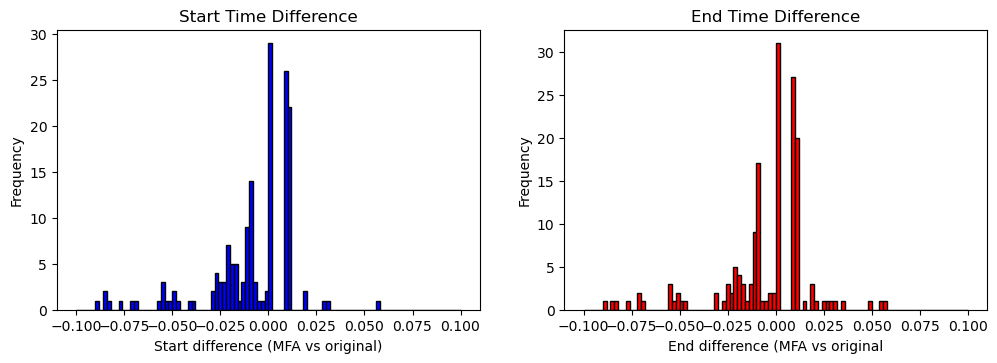

In [36]:
import matplotlib.pyplot as plt

#Get the differences
combined_df_start =  combined_timings["start_time"] - combined_timings["tmin"]
#print("start difference\n",combined_df_start)

combined_df_end =  combined_timings["end_time"] - combined_timings["tmax"]
#print("End difference\n", combined_df_end)


plt.figure(figsize=(12, 8))
# Histogram of Start difference
plt.subplot(2, 2, 1)
plt.hist(combined_df_start, bins = 100, color='blue', edgecolor='black', range=(-0.1, 0.1))
plt.title("Start Time Difference")
plt.xlabel("Start difference (MFA vs original)")
plt.ylabel("Frequency")

# Histogram of End difference
plt.subplot(2, 2, 2)
plt.hist(combined_df_end, bins = 100, color='red', edgecolor='black', range=(-0.1, 0.1))
plt.title("End Time Difference")
plt.xlabel("End difference (MFA vs original)")
plt.ylabel("Frequency")